#### Model Training

**Importing data and required packages**

In [34]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [35]:
# Importing modified csv data as pandas dataframe

df = pd.read_csv('data/data_for_model_training.csv')

In [36]:
# Showing top 5 records
df.head()

,Unnamed: 0,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,0,3.260,0.829,1.676,0.0,1.0,1.453,3.770
1,1,2.189,0.580,0.863,0.0,0.0,1.348,3.115
2,2,2.125,0.638,0.831,0.0,0.0,1.348,3.531
3,3,3.027,0.331,1.472,1.0,0.0,1.807,3.510
4,4,2.094,0.827,0.860,0.0,0.0,1.886,5.390


In [37]:
df = df.drop('Unnamed: 0', axis=1)

**Preparing X and Y variables**

In [38]:
X = df.drop('LC50', axis=1)

In [39]:
X.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP
0,3.260,0.829,1.676,0.0,1.0,1.453
1,2.189,0.580,0.863,0.0,0.0,1.348
2,2.125,0.638,0.831,0.0,0.0,1.348
3,3.027,0.331,1.472,1.0,0.0,1.807
4,2.094,0.827,0.860,0.0,0.0,1.886


In [40]:
y = df['LC50']

In [41]:
y.head()

0    3.770
1    3.115
2    3.531
3    3.510
4    5.390
Name: LC50, dtype: float64

In [42]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

transformers = []

# Using a conditional statement to keep dataset flexible, incase if the dataset changed in future
if len(cat_features) > 0:
    transformers.append(("OneHotEncoder", oh_transformer, cat_features))

if len(num_features) > 0:
    transformers.append(("StandardScaler", numeric_transformer, num_features))

preprocessor = ColumnTransformer(transformers=transformers)

In [43]:
X = preprocessor.fit_transform(X)

In [44]:
X.shape

(907, 6)

In [45]:
# Creating an evaluation function to give all metrrics after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [62]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("K_Neighbors_Regressor", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random_Forest_Regressor", RandomForestRegressor()),
    ("XGBRegressor", XGBRegressor()), 
    ("AdaBoost Regressor", AdaBoostRegressor())
]

In [339]:
from sklearn.model_selection import train_test_split
import pandas as pd

def evaluate_models(X, y, models, model_params=None):
    '''
    This function takes in X, y, models list, and optional best parameters as input
    It splits the data into Train Test split
    Iterates through the given model list and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    data_splits=(X_train, X_test, y_train, y_test)
    
    model_list = []
    r2_list = []
    
    for model_name, model in models:  # Unpacking only two values
        # Set the best parameters for the model if provided
        if model_params is not None and model_name in model_params:
            model.set_params(**model_params[model_name])
        
        model.fit(X_train, y_train) 

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
        model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

        print(model_name)
        model_list.append(model_name)

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')
    
        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)
            
        print('='*35)
        print('\n')
        
    report = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)
    return report, data_splits

In [340]:
results,_ = evaluate_models(X, y, models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.8303
- Mean Absolute Error: 0.6234
- R2 Score: 0.5701
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7223
- Mean Absolute Error: 0.5698
- R2 Score: 0.7169


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.2663
- Mean Absolute Error: 1.0277
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3583
- Mean Absolute Error: 1.1253
- R2 Score: -0.0012


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.8303
- Mean Absolute Error: 0.6235
- R2 Score: 0.5701
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7225
- Mean Absolute Error: 0.5701
- R2 Score: 0.7167


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6654
- Mean Absolute Error: 0.4900
- R2 Score: 0.7239
----------------------

In [341]:
results

,Model Name,R2_Score
6,XGBRegressor,0.748912
3,K-Neighbors Regressor,0.743563
5,Random Forest Regressor,0.741136
0,Linear Regression,0.716855
2,Ridge,0.716673
7,AdaBoost Regressor,0.618193
4,Decision Tree,0.528387
1,Lasso,-0.001231


**Hyper-parameter tuning**

In [274]:
from sklearn.model_selection import GridSearchCV

# Initialize hyperparameters for tuning
xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20, 30],
    "n_estimators": [100, 200, 300],
    "colsample_bylevel": [0.5, 0.8, 1, 0.3, 0.4]
}


rf_params = {
    "max_depth": [10, 12, None, 15],
    "max_features": ['sqrt', 'log2', None],
    "min_samples_split": [100, 150, 200, 300],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

# Models list for Hyperparameter tuning
gridsearch_models = [
    ('XGBRegressor', XGBRegressor(), xgboost_params),
    ("Random_Forest_Regressor", RandomForestRegressor(), rf_params),
    ("K_Neighbors_Regressor", KNeighborsRegressor(), knn_params)
]

# Dictionary to store the best parameters for each model
model_param = {}

# Perform GridSearchCV for each model
for name, model, params in gridsearch_models:
    grid = GridSearchCV(estimator=model,
                        param_grid=params,
                        cv=3,
                        verbose=2,
                        n_jobs=-1)
    grid.fit(X, y)
    model_param[name] = grid.best_params_

# Print the best parameters for each model
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 150 candidates, totalling 450 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBRegressor -------------------
{'colsample_bylevel': 0.3, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}
---------------- Best Params for Random_Forest_Regressor -------------------
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 100, 'n_estimators': 10}
---------------- Best Params for K_Neighbors_Regressor -------------------
{'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}


In [342]:
after_hpt, data_splits = evaluate_models(X, y, models, model_param)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7824
- Mean Absolute Error: 0.5912
- R2 Score: 0.6174
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9080
- Mean Absolute Error: 0.6760
- R2 Score: 0.5555


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.2649
- Mean Absolute Error: 1.0306
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3638
- Mean Absolute Error: 1.1107
- R2 Score: -0.0028


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.7824
- Mean Absolute Error: 0.5912
- R2 Score: 0.6174
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9080
- Mean Absolute Error: 0.6761
- R2 Score: 0.5555


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6310
- Mean Absolute Error: 0.4603
- R2 Score: 0.7512
----------------------

In [279]:
after_hpt

,Model Name,R2_Score
3,K-Neighbors Regressor,0.572172
5,Random Forest Regressor,0.555510
2,Ridge,0.544164
0,Linear Regression,0.543973
6,XGBRegressor,0.540209
7,AdaBoost Regressor,0.534225
4,Decision Tree,0.127850
1,Lasso,-0.000003


In [343]:
X_train, X_test, y_train, y_test = data_splits

**XGBoost algorithm performed moderately well compared to other algorithms**

In [363]:
xgb_model = XGBRegressor(colsample_bylevel=0.3, learning_rate=0.1, max_depth=20, n_estimators=100)
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 65.00


In [364]:
# rf_model = RandomForestRegressor(max_depth=None, max_features= 'log2', min_samples_split=100, n_estimators=10)
# rf_model = rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test)
# score = r2_score(y_test, y_pred)*100
# print(" Accuracy of the model is %.2f" %score)


In [367]:
# knn_model = XGBRegressor(algorithm='brute', n_neighbors=9, weights='distance')
# knn_model = knn_model.fit(X_train, y_train)
# y_pred = knn_model.predict(X_test)
# score = r2_score(y_test, y_pred)*100
# print(" Accuracy of the model is %.2f" %score)

**Actual values Vs Predicted values**

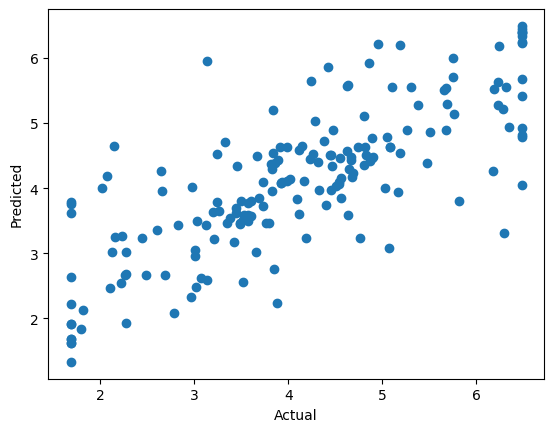

In [368]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='LC50'>

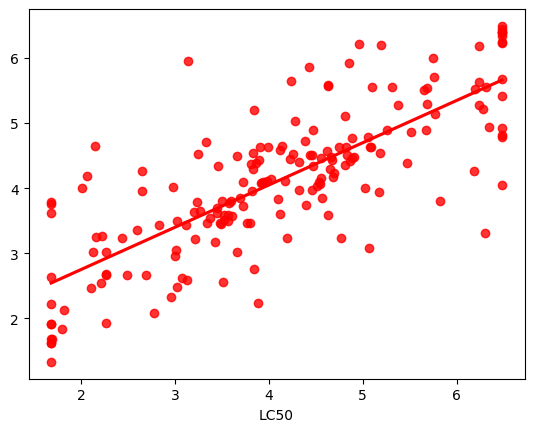

In [369]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')